# In-Class Exercise

Try to a build a simple optimizer to minimize:
$f(w) = a[0]*w^d + a[1]*w^(d-1) + ... + a[d]$
    

for the coefficients `a = [1,0,-2,0.5,0]`


*  Plot the function f(w)
*  Can you see where the minima is?
*  Write a function that outputs f(w) and its gradient.
*  Test the gradient
*  Run the optimizer on the function to see if it finds the minima.
*  Print the funciton value and number of iterations.

Bonus: Instead of writing the function for a specific coefficient vector a, create a class that works for an arbitrary vector a.
You may wish to use the `np.polyval(a,x)` method to evaluate the polynomial.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.polynomial.polynomial as poly

From the figure, the minima seems to occuring approximately around w = 0.0 with approx min f(w) = 0.0


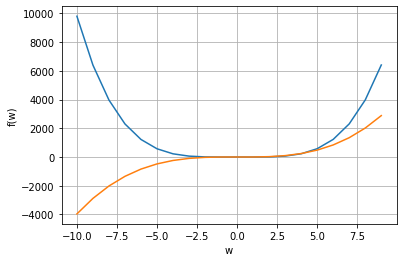

In [5]:
def plot_poly(x,y):
  plt.plot(x,y,"-")
  plt.xlabel("w")
  plt.ylabel("f(w)")
  plt.grid(True)

def compute_func_and_gradient(ai,w):
  d = len(ai)-1
  f_w = np.polyval(ai,w)

  for i in range(len(ai)):
    ai[i] *= d
    d -= 1
  ai.pop()
  df_dw = np.polyval(ai,w)
  return f_w,df_dw

a = [1,0,-2,0.5,0]
w = np.arange(-10,10)
f_w,df_dw = compute_func_and_gradient(a.copy(),w)
plot_poly(w,f_w)
plot_poly(w,df_dw)

print(f"From the figure, the minima seems to occuring approximately around w = {0.0} with approx min f(w) = {0.0}")

In [6]:
def test_gradient(n):
  w0 = np.random.randn(n)

  step = 1e-6
  w1 = w0 + step*np.random.randn(n)

  # Measure the function and gradient at w0 and w1
  f0, fgrad0 = compute_func_and_gradient(a.copy(),w0)
  f1, fgrad1 = compute_func_and_gradient(a.copy(),w1)
  # Predict the amount the function should have changed based on the gradient
  df_est = fgrad0.dot(w1-w0)
  
  # Print the two values to see if they are close
  print(f"Actual f1-f0    = {f1-f0}")
  print(f"Predicted f1-f0 = {df_est}")

test_gradient(1)

Actual f1-f0    = [5.81709359e-07]
Predicted f1-f0 = 5.817095346059864e-07


In [8]:
def grad_opt_simp(winit, lr=1e-3,nit=1000):
    
    w0 = winit
    
    hist = {'w': [], 'f': []}
    
    for it in range(nit):

        f0, fgrad0 = compute_func_and_gradient(a.copy(),w0)

        w0 = w0 - lr*fgrad0
        
        hist['f'].append(f0)
        hist['w'].append(w0)
        print(f"Iteration : {it} => [f, w]: [{f0,w0}")

    for elem in ('f', 'w'):
        hist[elem] = np.array(hist[elem])
    return hist

In [9]:
winit = np.random.randn(1)

nit = 35000
lr = 1e-4

hist = grad_opt_simp(winit, lr=lr, nit=nit)


Streaming output truncated to the last 5000 lines.
Iteration : 30000 => [f, w]: [(array([-0.51674851]), array([0.93040292]))
Iteration : 30001 => [f, w]: [(array([-0.51674851]), array([0.93040292]))
Iteration : 30002 => [f, w]: [(array([-0.51674851]), array([0.93040292]))
Iteration : 30003 => [f, w]: [(array([-0.51674851]), array([0.93040292]))
Iteration : 30004 => [f, w]: [(array([-0.51674851]), array([0.93040292]))
Iteration : 30005 => [f, w]: [(array([-0.51674851]), array([0.93040292]))
Iteration : 30006 => [f, w]: [(array([-0.51674851]), array([0.93040292]))
Iteration : 30007 => [f, w]: [(array([-0.51674851]), array([0.93040292]))
Iteration : 30008 => [f, w]: [(array([-0.51674851]), array([0.93040292]))
Iteration : 30009 => [f, w]: [(array([-0.51674851]), array([0.93040292]))
Iteration : 30010 => [f, w]: [(array([-0.51674851]), array([0.93040292]))
Iteration : 30011 => [f, w]: [(array([-0.51674851]), array([0.93040292]))
Iteration : 30012 => [f, w]: [(array([-0.51674851]), array([0

In [10]:
itr = np.argmin(hist["f"])
fmin,wmin = np.min(hist["f"]),hist["w"][itr][0]
print(f"Iteration at which f acheives minima: {itr}")
print(f"Minimum value of f(w) : {fmin} occurs at w = {wmin}")

Iteration at which f acheives minima: 30587
Minimum value of f(w) : -0.5167485082852494 occurs at w = 0.9304029238115916


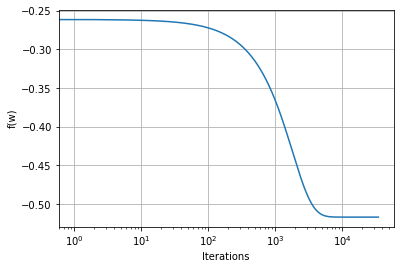

In [11]:
t = np.arange(nit)
plt.semilogx(t, hist['f'])
plt.xlabel("Iterations")
plt.ylabel("f(w)")
plt.grid()

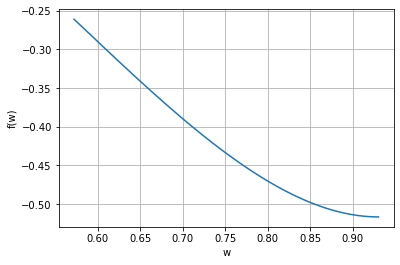

In [12]:
plt.plot(hist["w"], hist['f'],"-")
plt.xlabel("w")
plt.ylabel("f(w)")
plt.grid()